In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set_style('ticks')

# ROC_AUC Curves

In [4]:
#LR = np.load("./Logistic_Regression/X1/LogReg_y_B_pred_prob.npy")
RF = pd.read_pickle("./Random Forest/X1/RF_validation_results_X1.pkl")
LGBM = pd.read_pickle("./LGBM/LGBM_Model1_validation_results.pkl")
XGB = pd.read_pickle("./XGBoost/XGB_X1_validation_results.pkl")

In [11]:
LGBM.head()

,True Label,Predicted Label
0,0,0.0
1,0,0.0
2,1,1.0
3,0,0.0
4,0,0.0


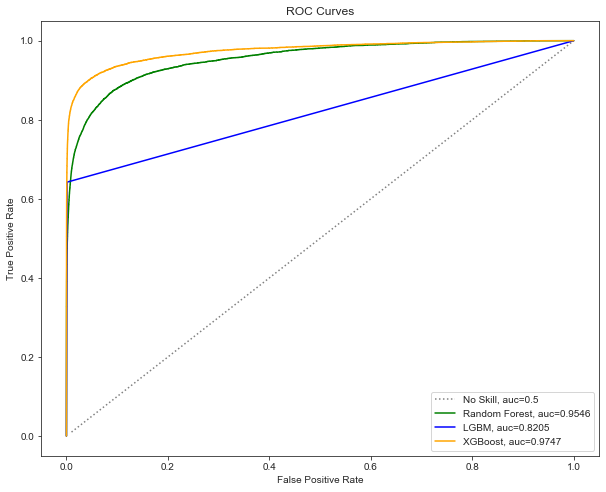

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

# No skill ROC
fpr, tpr = np.arange(1,101)/100, np.arange(1,101)/100
ax.plot(fpr,tpr,label="No Skill, auc=0.5", color='gray', linestyle=':')

# Logistic Regression

# Random Forest
fpr, tpr, thresh = metrics.roc_curve(RF['True Label'], RF['Predicted Label'])
auc = np.round(metrics.roc_auc_score(RF['True Label'], RF['Predicted Label']), 4)
ax.plot(fpr,tpr,label="Random Forest, auc="+str(auc), color='green')

# LGBM
fpr, tpr, thresh = metrics.roc_curve(LGBM['True Label'], LGBM['Predicted Label'])
auc = np.round(metrics.roc_auc_score(LGBM['True Label'], LGBM['Predicted Label']), 4)
ax.plot(fpr,tpr,label="LGBM, auc="+str(auc), color='blue')

# XGB
fpr, tpr, thresh = metrics.roc_curve(XGB['True Label'], XGB['Predicted Label'])
auc = np.round(metrics.roc_auc_score(XGB['True Label'], XGB['Predicted Label']), 4)
ax.plot(fpr,tpr,label="XGBoost, auc="+str(auc), color='orange')

ax.set_title("ROC Curves")
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate")
plt.legend(loc=4)
fig.savefig("ROC.png")
plt.show()

# Feature Importance Plots

In [30]:
#LR = 
RF = pd.read_pickle("./Random Forest/X1/RF_feature_importance_X1.pkl")
LGBM = pd.read_pickle("./LGBM/LGBM_Model1_feature_importance.pkl")
XGB = pd.read_pickle("./XGBoost/XGB_X1_feature_importance.pkl")

In [31]:
# Normalized LGBM
LGBM["Value"] = LGBM['Value']/np.sum(LGBM['Value'])

In [32]:
def gen_matrix(rf, lgbm, xgb, top_start, top_end):
    # Merge datasets
    rf_lgbm = rf.merge(lgbm, on=['Feature'], how='outer', suffixes=['_rf', '_lgbm'])
    merged = rf_lgbm.merge(xgb, on=['Feature'], how='outer')
    
    # Create aggregate col
    merged['sum'] = merged['Value'] + merged['Value_rf'] + merged['Value_lgbm']
    
    # Sort by feature importance
    merged = merged.sort_values(by='sum', ascending=False)
    merged.reset_index(inplace=True, drop=True)
    # Extract top num features
    
    merged = merged.loc[top_start:top_end, :]
    
    feats = merged['Feature']
    merged.drop(columns=['Feature', 'sum'], inplace=True)
    return merged.T.values, feats

In [33]:
vmax = 0.1172
vmin = 0.0010

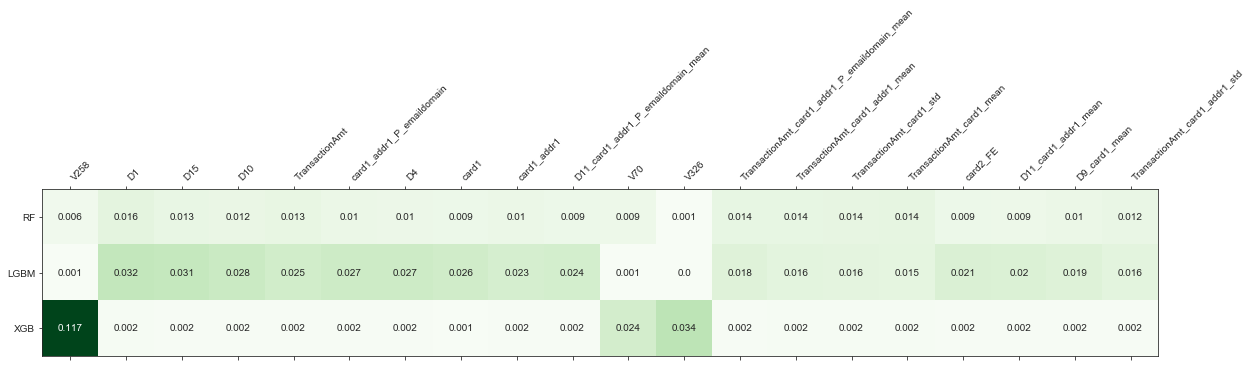

In [34]:
matrix, feats = gen_matrix(RF, LGBM, XGB, 0, 19)
N = feats.shape[0]

# Create color coded matrix 
fig, ax = plt.subplots(1, 1, figsize=(20,10))

min_val, max_val = 0, 10

for i in range(N):
    for j in range(3):
        c = np.round(matrix[j,i], 3)
        if c == 0.117:
            ax.text(i, j, str(c), color='white', va='center', ha='center')
        else:
            ax.text(i, j, str(c), va='center', ha='center')
        

ax.matshow(matrix, cmap=plt.cm.Greens, vmin=vmin, vmax=vmax)
ax.set_xticks(np.arange(0, N));
ax.set_xticklabels(feats, rotation=45, ha='left');
ax.set_yticks(np.arange(0, 3));
ax.set_yticklabels(['RF','LGBM','XGB']);
fig.savefig("matrix.png")

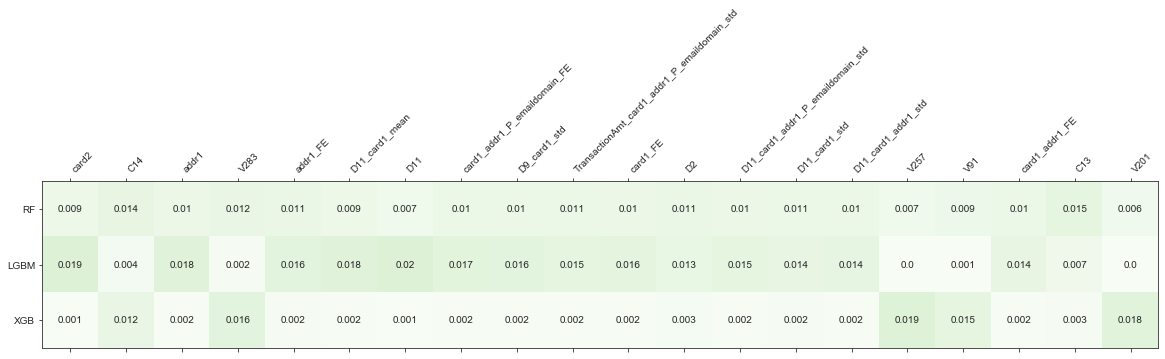

In [28]:
matrix, feats = gen_matrix(RF, LGBM, XGB, 20, 39)
N = feats.shape[0]

# Create color coded matrix 
fig, ax = plt.subplots(1, 1, figsize=(20,10))

min_val, max_val = 0, 10

for i in range(N):
    for j in range(3):
        c = np.round(matrix[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')
        

ax.matshow(matrix, cmap=plt.cm.Greens, vmin=vmin, vmax=vmax)
ax.set_xticks(np.arange(0, N));
ax.set_xticklabels(feats, rotation=45, ha='left');
ax.set_yticks(np.arange(0, 3));
ax.set_yticklabels(['RF','LGBM','XGB']);
fig.savefig("matrix.png")

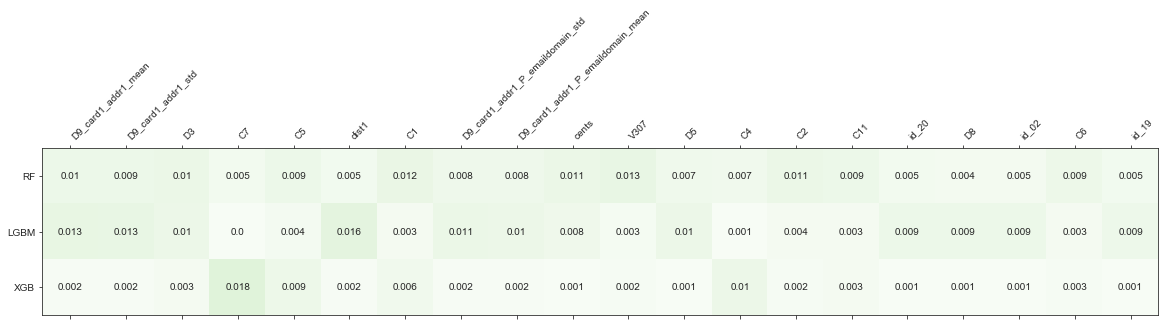

In [29]:
matrix, feats = gen_matrix(RF, LGBM, XGB, 40, 59)
N = feats.shape[0]

# Create color coded matrix 
fig, ax = plt.subplots(1, 1, figsize=(20,10))

min_val, max_val = 0, 10

for i in range(N):
    for j in range(3):
        c = np.round(matrix[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')
        

ax.matshow(matrix, cmap=plt.cm.Greens, vmin=vmin, vmax=vmax)
ax.set_xticks(np.arange(0, N));
ax.set_xticklabels(feats, rotation=45, ha='left');
ax.set_yticks(np.arange(0, 3));
ax.set_yticklabels(['RF','LGBM','XGB']);
fig.savefig("matrix.png")

### Older version of matrix plot

In [28]:
def gen_matrix(rf, lgbm, xgb, top_start, top_end):
    
    RF_top = rf.loc[top_start:top_end, :]
    LGBM_top = lgbm.loc[top_start:top_end, :]
    XGB_top = xgb.loc[top_start:top_end, :]
    
    rf_lgbm = RF_top.merge(LGBM_top, on=['Feature'], how='outer', suffixes=['_rf', '_lgbm'])
    merged = rf_lgbm.merge(XGB_top, on=['Feature'], how='outer')
    feats = merged['Feature']
    merged.drop(columns=['Feature'], inplace=True)
    return merged.T.values, feats

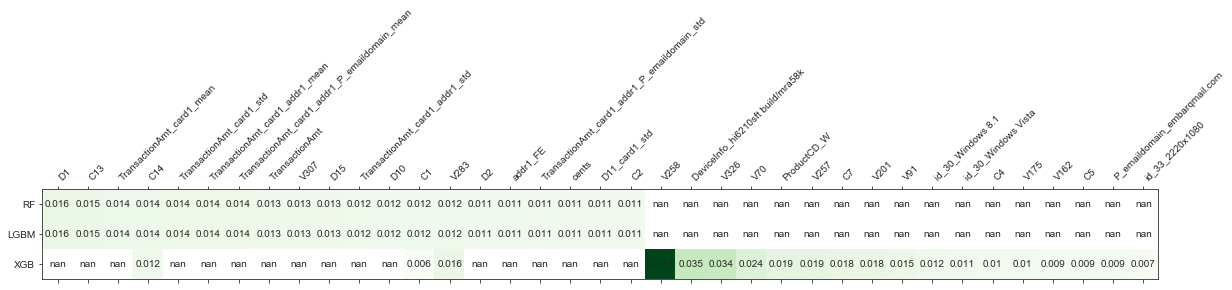

In [29]:
matrix, feats = gen_matrix(RF, LGBM, XGB, 0, 19)
N = feats.shape[0]

# Create color coded matrix 
fig, ax = plt.subplots(1, 1, figsize=(20,10))

min_val, max_val = 0, 10

for i in range(N):
    for j in range(3):
        c = np.round(matrix[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')
        

ax.matshow(matrix, cmap=plt.cm.Greens)
ax.set_xticks(np.arange(0, N));
ax.set_xticklabels(feats, rotation=45, ha='left');
ax.set_yticks(np.arange(0, 3));
ax.set_yticklabels(['RF','LGBM','XGB']);
fig.savefig("matrix.png")

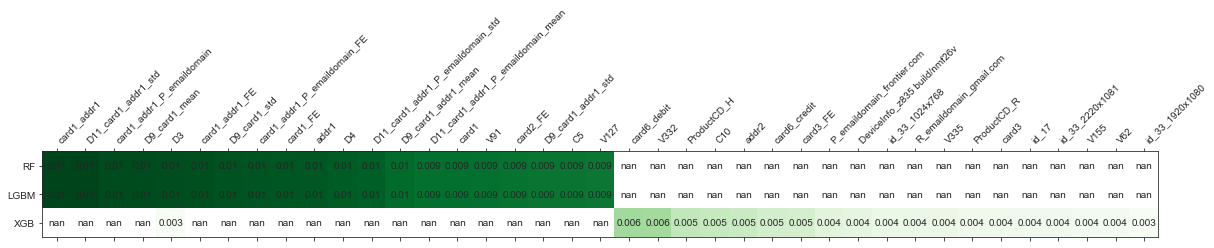

In [30]:
matrix, feats = gen_matrix(RF, LGBM, XGB, 20, 39)
N = feats.shape[0]

# Create color coded matrix 
fig, ax = plt.subplots(1, 1, figsize=(20,10))

min_val, max_val = 0, 10

for i in range(N):
    for j in range(3):
        c = np.round(matrix[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')
        

ax.matshow(matrix, cmap=plt.cm.Greens)
ax.set_xticks(np.arange(0, N));
ax.set_xticklabels(feats, rotation=45, ha='left');
ax.set_yticks(np.arange(0, 3));
ax.set_yticklabels(['RF','LGBM','XGB']);
fig.savefig("matrix1.png")

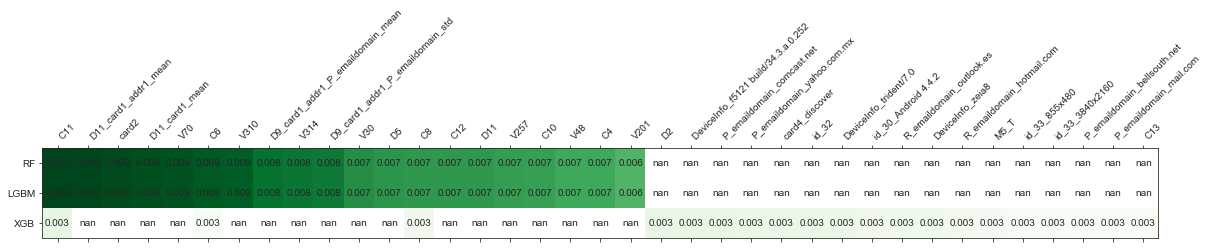

In [31]:
matrix, feats = gen_matrix(RF, LGBM, XGB, 40, 59)
N = feats.shape[0]

# Create color coded matrix 
fig, ax = plt.subplots(1, 1, figsize=(20,10))

min_val, max_val = 0, 10

for i in range(N):
    for j in range(3):
        c = np.round(matrix[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')
        

ax.matshow(matrix, cmap=plt.cm.Greens)
ax.set_xticks(np.arange(0, N));
ax.set_xticklabels(feats, rotation=45, ha='left');
ax.set_yticks(np.arange(0, 3));
ax.set_yticklabels(['RF','LGBM','XGB']);
fig.savefig("matrix2.png")

In [180]:
def gen_matrix(rf, lgbm, xgb, top_num):
    
    RF_top = rf.loc[0:top_num-1, :]
    LGBM_top = lgbm.loc[0:top_num-1, :]
    XGB_top = xgb.loc[0:top_num-1, :]
    
    rf_lgbm = RF_top.merge(LGBM_top, on=['Feature'], how='outer', suffixes=['_rf', '_lgbm'])
    merged = rf_lgbm.merge(XGB_top, on=['Feature'], how='outer')
    feats = merged['Feature']
    merged.drop(columns=['Feature'], inplace=True)
    return merged.values, feats

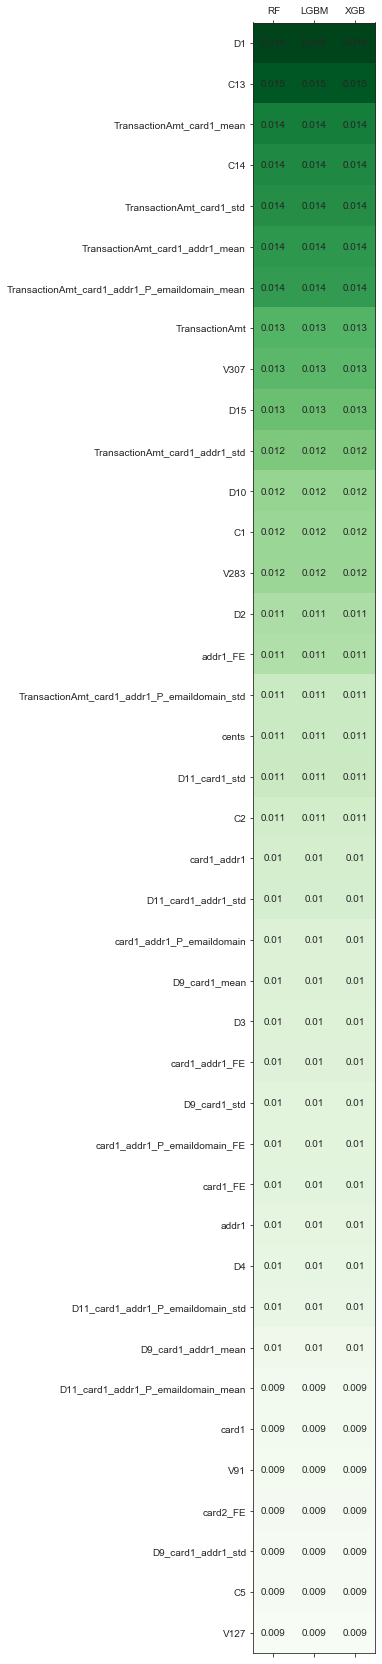

In [181]:
matrix, feats = gen_matrix(RF, LGBM, XGB, 40)
N = feats.shape[0]

# Create color coded matrix 
fig, ax = plt.subplots(1, 1, figsize=(10,30))

min_val, max_val = 0, 10

for i in range(3):
    for j in range(N):
        c = np.round(matrix[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')
        

ax.matshow(matrix, cmap=plt.cm.Greens)
ax.set_yticks(np.arange(0, N));
ax.set_yticklabels(feats);
ax.set_xticks(np.arange(0, 3));
ax.set_xticklabels(['RF','LGBM','XGB']);
fig.savefig("matrix3.png")

In [105]:
RF_top = RF_feats.loc[0:9, :]
LGBM_top = RF_top.copy()
LGBM_top["Value"] = LGBM_top["Value"] - 0.003
XGB_top = RF_top.copy()
XGB_top["Value"] = XGB_top["Value"] + 0.001

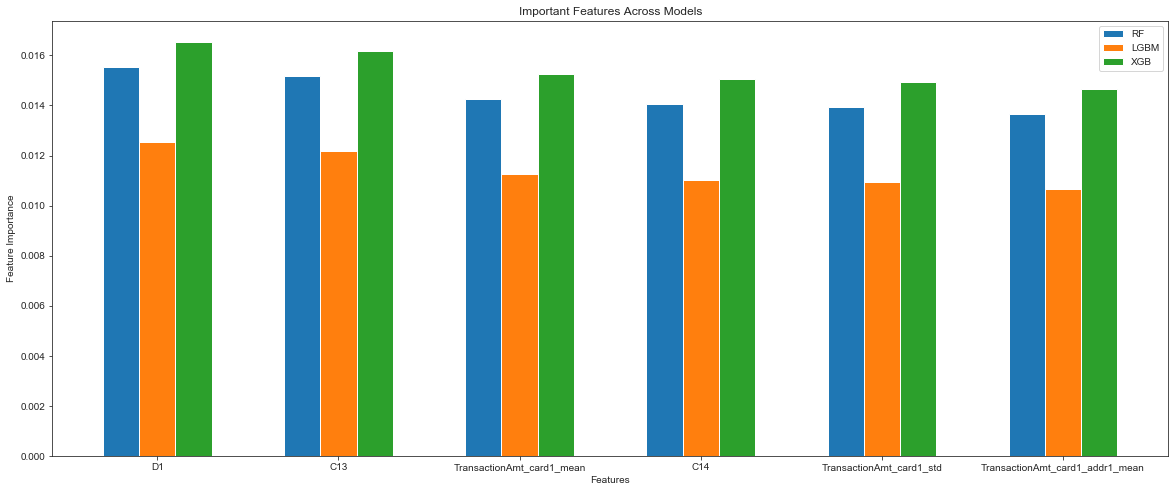

In [230]:
fig, ax = plt.subplots(1,1, figsize=(20,8))

ind = np.arange(6)    # the x locations for the groups
width = 0.2       # the width of the bars

ax.bar(x=ind, height=RF_top["Value"], width=width, label='RF')
ax.bar(x=ind+width, height=LGBM_top["Value"], width=width, label='LGBM')
ax.bar(x=ind+2*width, height=XGB_top["Value"], width=width, label='XGB')

ax.set_xticks(ind + 2*width / 2)
ax.set_xticklabels(RF_top["Feature"])
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title("Important Features Across Models")
plt.legend(loc=1)
plt.show()